In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset 
df = pd.read_csv('Dataset.csv',index_col=False)

In [ ]:
df.shape

(11770, 21)

In [ ]:
df.head()

,Patient ID,Year of diagnosis,marital_status_code,race_code,gender_code,age,primary_site_code7,histologic_type_code,behaviour_code,grade_code10,...,cs_lymph_nodes_code,cs_extension_code,regional_positive_nodes,number_of_nodes_examined,cs_tumor_size,stage_of_cancer_code,radiation_code,site_specific_surgery_code,number_of_primaries,survived_code
0,9724,2012,1,2,1,78,162,8140,1,3,...,710,610,11,21,75,3,0,33,3,0
1,11950,2004,3,1,1,89,165,8140,1,2,...,100,400,3,14,35,2,3,30,4,0
2,30834,2011,3,1,2,90,161,8010,1,3,...,0,160,98,0,0,1,0,0,4,0
3,54919,2010,1,1,2,71,160,8140,1,3,...,100,400,1,5,12,2,4,61,3,1
4,58037,2008,1,4,2,77,162,8020,1,4,...,0,160,0,6,50,1,0,30,4,0


In [ ]:
cancer_type_df.dtypes

,0
Age,int64
Sex,int64
Behavior Code,int64
Extension,int64
Grade,int64
Histologic Type,int64
Lymph Nodes,int64
Marital Status,int64
Metastasis,int64
Primary Site,int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Features
features = ['age', 'cs_tumor_size', 'number_of_nodes_examined', 'regional_positive_nodes', 'number_of_primaries']
df_selected = df[features]

# Calculate Correlation Matrix
corr_matrix = df_selected.corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Liver Cancer - Correlation Heatmap')
plt.show()


In [ ]:
final_df.dtypes

,0
Age,int64
Regional Nodes Examined,int64
Regional Nodes Positive,int64
Tumor Size,int64
Sex,int64
...,...
Primary Site_188,float64
Primary Site_189,float64
Primary Site_199,float64
Primary Site_209,float64


In [ ]:
final_df.head()

,Age,Regional Nodes Examined,Regional Nodes Positive,Tumor Size,Sex,Summary Stage,Survival Status,Grade,Race,Marital Status,...,Primary Site_183,Primary Site_184,Primary Site_185,Primary Site_186,Primary Site_187,Primary Site_188,Primary Site_189,Primary Site_199,Primary Site_209,Primary Site_260
0,39,8,1,35,1,3,1,2,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,67,0,98,50,1,2,1,2,2,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,64,7,0,40,2,1,1,2,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70,10,1,15,1,2,1,2,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,76,0,98,0,2,3,0,1,1,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cancer_type_stage_df = final_df[cancer_type_df['Summary Stage'] == 2]
cancer_type_stage_df.shape

(3285, 88)

In [ ]:
# Examine the survival distribution of the current phase
print("Current stage survival distribution:")
print(cancer_type_stage_df['Survival Status'].value_counts(normalize=True))

Current stage survival distribution:
Survival Status
0    0.738204
1    0.261796
Name: proportion, dtype: float64


In [ ]:
!pip install aif360


In [ ]:
!pip install fairlearn


In [ ]:
from sklearn.model_selection import train_test_split
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from aif360.sklearn.inprocessing import ExponentiatedGradientReduction

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# separate array into input and output components
X = cancer_type_stage_df.drop(['Survival Status', 'Summary Stage'], axis=1)
y = cancer_type_stage_df['Survival Status']

# Training and test set partitioning using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42,
    stratify=y  # Stratification based on survival status
)

# Verify the distribution in the training and test sets
print("\nTraining set survival distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set survival distribution:")
print(y_test.value_counts(normalize=True))

In [ ]:
# Showing the distribution
distribution_df = pd.DataFrame({
    'Overall': y.value_counts(normalize=True),
    'Training Set': y_train.value_counts(normalize=True),
    'Test Set': y_test.value_counts(normalize=True)
})
print("\nDistribution Comparison:")
print(distribution_df)


Distribution Comparison:
                  Overall  Training Set  Test Set
Survival Status                                  
0                0.516059      0.516066   0.51603
1                0.483941      0.483934   0.48397


,Feature,Survived_Mean,Survived_Median,Survived_STD,Not_Survived_Mean,Not_Survived_Median,Not_Survived_STD,Test_Type,P_Value
0,Age,55.59,59.00,16.33,64.39,63.00,12.17,Mann-Whitney U,4.49e-125
1,Regional Nodes Examined,1.37,0.00,10.15,2.33,0.00,14.85,Mann-Whitney U,5.02e-93
2,Regional Nodes Positive,83.80,98.00,34.50,95.95,98.00,14.04,Mann-Whitney U,7.73e-140
3,Tumor Size,36.79,26.00,32.17,52.34,43.00,45.95,Mann-Whitney U,2.87e-52
4,Sex,1.70,2.00,0.46,1.77,2.00,0.42,Mann-Whitney U,2.87e-15
5,Summary Stage,1.19,1.00,0.47,1.75,2.00,0.82,Mann-Whitney U,2.78e-248
6,Survival Status,1.00,1.00,0.00,0.00,0.00,0.00,Mann-Whitney U,0.00e+00
7,Grade,0.86,0.00,1.06,0.68,0.00,1.07,Mann-Whitney U,2.27e-25
8,Race,1.57,1.00,0.91,1.62,1.00,1.02,Mann-Whitney U,6.23e-01
9,Marital Status,2.53,1.00,2.15,2.70,1.00,2.08,Mann-Whitney U,2.79e-05


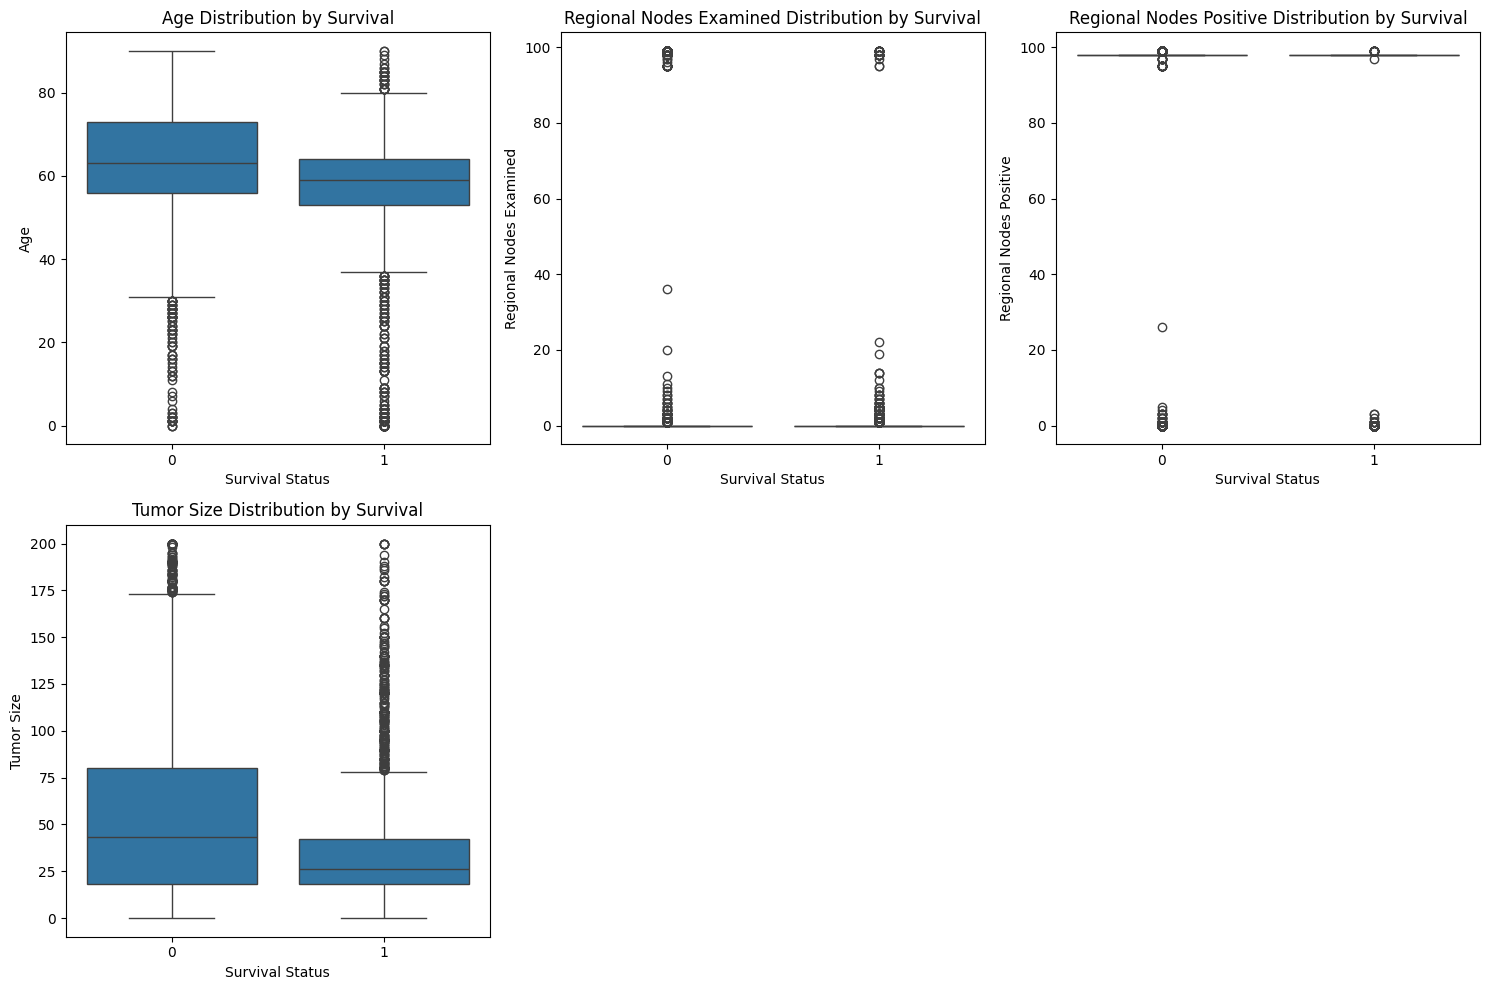

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np

def analyze_feature_distributions(df, features, target='Survival Status'):
    """
    Analyze the distribution differences of features between survival/non-survival groups
    """
    results = []

    for feature in features:
        survived = df[df[target] == 1][feature]
        not_survived = df[df[target] == 0][feature]

        # Calculate basic statistics
        survived_stats = {
            'mean': survived.mean(),
            'median': survived.median(),
            'std': survived.std()
        }
        not_survived_stats = {
            'mean': not_survived.mean(),
            'median': not_survived.median(),
            'std': not_survived.std()
        }

        # Perform statistical significance tests
        if df[feature].dtype in ['int64', 'float64']:  # Numerical variables
            # Mann-Whitney U test
            statistic, p_value = stats.mannwhitneyu(survived, not_survived,
                                                  alternative='two-sided')
            test_name = 'Mann-Whitney U'
        else:  # Categorical variables
            # Chi-square test
            contingency_table = pd.crosstab(df[feature], df[target])
            statistic, p_value = stats.chi2_contingency(contingency_table)[:2]
            test_name = 'Chi-square'

        results.append({
            'Feature': feature,
            'Survived_Mean': survived_stats['mean'],
            'Survived_Median': survived_stats['median'],
            'Survived_STD': survived_stats['std'],
            'Not_Survived_Mean': not_survived_stats['mean'],
            'Not_Survived_Median': not_survived_stats['median'],
            'Not_Survived_STD': not_survived_stats['std'],
            'Test_Type': test_name,
            'P_Value': p_value
        })

    return pd.DataFrame(results)

# Create analysis table
analysis_df = analyze_feature_distributions(final_df, final_df.columns)

# Format output
formatted_df = analysis_df.style\
    .format({
        'Survived_Mean': '{:.2f}',
        'Survived_Median': '{:.2f}',
        'Survived_STD': '{:.2f}',
        'Not_Survived_Mean': '{:.2f}',
        'Not_Survived_Median': '{:.2f}',
        'Not_Survived_STD': '{:.2f}',
        'P_Value': '{:.2e}'
    })\
    .background_gradient(subset=['P_Value'], cmap='RdYlGn_r')\
    .highlight_null(color='lightgray')\
    .set_caption("Feature Distribution Analysis between Survived and Non-survived Patients")

# Save as LaTeX table format (if needed)
# analysis_df.to_latex('feature_distribution_analysis.tex', index=False)

# Display table
display(formatted_df)

# Add distribution visualization
import seaborn as sns

def plot_feature_distributions(df, numeric_features, target='Survival Status'):
    n_features = len(numeric_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    plt.figure(figsize=(15, 5*n_rows))

    for idx, feature in enumerate(numeric_features):
        plt.subplot(n_rows, n_cols, idx+1)
        sns.boxplot(x=target, y=feature, data=df)
        plt.title(f'{feature} Distribution by Survival')

    plt.tight_layout()
    plt.show()

# Create boxplots for numerical features
numeric_features = ['Age', 'Regional Nodes Examined', 'Regional Nodes Positive', 'Tumor Size']
plot_feature_distributions(final_df, numeric_features)

# 1. Logistic Regression

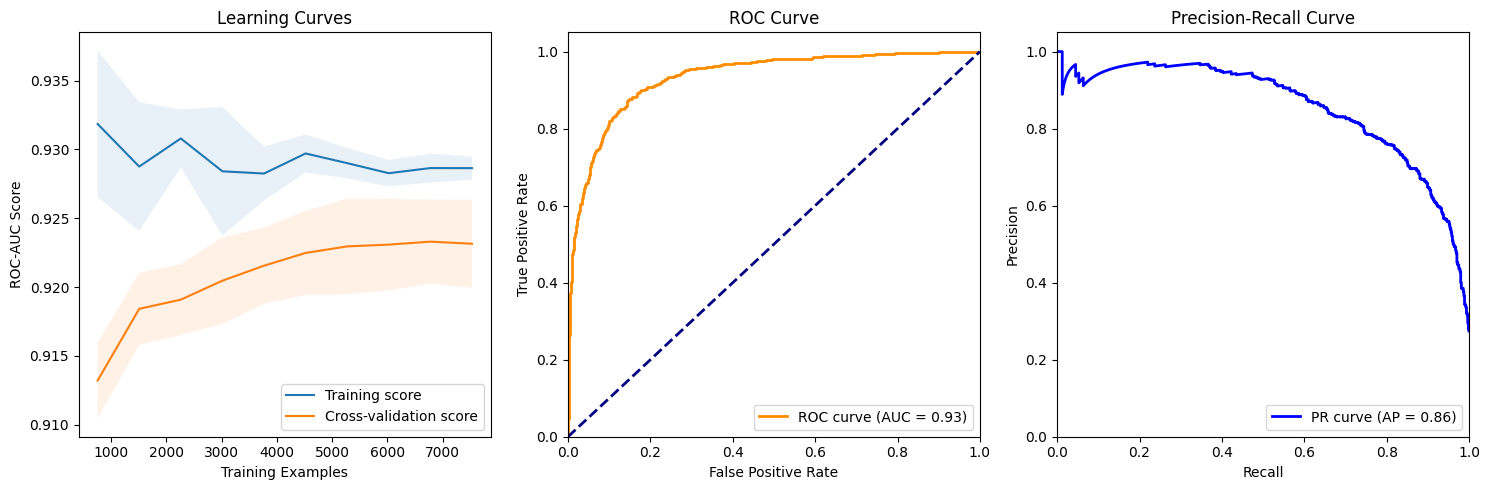

Best parameters: {'classifier__C': 0.01, 'classifier__class_weight': None}

Metrics on test set:
Accuracy: 0.880
Precision: 0.814
Recall: 0.731
F1: 0.770
AUC-ROC: 0.933
AUC-PR: 0.856

Cross-validation results:
roc_auc: 0.924 ± 0.004
precision: 0.812 ± 0.020
recall: 0.683 ± 0.010
f1: 0.742 ± 0.011

Confusion Matrix:
[[1600  108]
 [ 174  472]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, learning_curve
from sklearn.metrics import (roc_curve, precision_recall_curve, auc,
                           average_precision_score, precision_score,
                           recall_score, f1_score, confusion_matrix,
                           roc_auc_score, precision_recall_fscore_support)

# 1. Create pipeline with preprocessing and define parameter grid
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))
])

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__class_weight': ['balanced', None]
}

# 2. Set up cross-validation and perform grid search
scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring=scoring,
    refit='roc_auc',
    n_jobs=-1
)

# 3. Training model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
lr = best_model

# 4. Obtaining Predictive Probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 5. Calculate the values of the ROC and PR curves
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

# 6. Calculation of indicators
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_test, y_pred_proba)

# 7. Finding the optimal threshold (based on F1 scores)
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = pr_thresholds[optimal_threshold_idx]

y_pred = (y_pred_proba >= 0.5).astype(int)

# 8. Prediction using optimal thresholds
#y_pred = (y_pred_proba >= optimal_threshold).astype(int)


# 9. Calculation of all assessment indicators
metrics = {
    'Accuracy': np.mean(y_test == y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'AUC-ROC': roc_auc,
    'AUC-PR': average_precision
}

# 10. Creating a Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 11. Visualization results
plt.figure(figsize=(15, 5))

# Plot learning curves
plt.subplot(1, 3, 1)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='roc_auc'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training Examples')
plt.ylabel('ROC-AUC Score')
plt.title('Learning Curves')
plt.legend(loc='lower right')

# Plot ROC curve
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot PR curve
plt.subplot(1, 3, 3)
plt.plot(recall, precision, color='blue', lw=2,
         label=f'PR curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 12. Print the result
print("Best parameters:", grid_search.best_params_)
#print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print("\nMetrics on test set:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")

print("\nCross-validation results:")
# Get cross-validation results for each metrics
for metric in scoring.keys():
    cv_scores = []
    for i in range(cv.n_splits):
        score_name = f'split{i}_test_{metric}'
        cv_scores.append(grid_search.cv_results_[score_name][grid_search.best_index_])

    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)
    print(f"{metric}: {mean_score:.3f} ± {std_score:.3f}")

    # If need to see the specific scores for each fold, uncomment below
    # print(f"Individual fold scores for {metric}:")
    # for i, score in enumerate(cv_scores):
    #     print(f"Fold {i+1}: {score:.3f}")

print("\nConfusion Matrix:")
print(conf_matrix)

## 1.1 SHAP For Logestic Regression

In [ ]:
# import shap and data visualization tool
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

lr_explainer = shap.Explainer(lr_exp_grad_red.predict, X_train)

# Calculate SHAP values for the subset
lr_shap_values = lr_explainer(X_test)

PermutationExplainer explainer: 538it [04:42,  1.80it/s]                                                            


In [ ]:
print("Mitigated Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(lr_shap_values, X_test)

## 1.2 LIME For Logestic Regression

In [ ]:
# import the LimeTabularExplainer module
import lime
import lime.lime_tabular
import numpy as np


# get the feature names
feature_names = list(X_test.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
lr_explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_test),
                                 feature_names=X_test.columns,
                                 class_names = ['Dead', 'Alive'],
                                 mode = 'classification')

In [ ]:
# predict_fn_rf = lambda x: rf.predict_proba(x).astype(float)
i = np.random.randint(len(X_test))
print(y_test.iloc[i])
lr_exp = lr_explainer.explain_instance(X_test.iloc[i], lr_exp_grad_red.predict_proba)
lr_exp.show_in_notebook(show_all=False)

In [ ]:
lr_exp = lr_explainer.explain_instance(X_test.iloc[i], lr.predict_proba)
lr_exp.show_in_notebook(show_all=False)

# 2. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, learning_curve
from sklearn.metrics import (roc_curve, precision_recall_curve, auc,
                          average_precision_score, precision_score,
                          recall_score, f1_score, confusion_matrix)

# 1. Create pipeline with preprocessing and define parameter grid
pipeline = Pipeline([
   ('scaler', StandardScaler()),
   ('classifier', AdaBoostClassifier(random_state=42))
])

param_grid = {
   'classifier__n_estimators': [50, 100, 200],
   'classifier__learning_rate': [0.01, 0.1, 1.0],
   'classifier__algorithm': ['SAMME', 'SAMME.R']
}

# 2. Set up cross-validation and perform grid search
scoring = {
   'roc_auc': 'roc_auc',
   'precision': 'precision',
   'recall': 'recall',
   'f1': 'f1'
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
   pipeline,
   param_grid,
   cv=cv,
   scoring=scoring,
   refit='roc_auc',
   n_jobs=-1
)

# 3. Training model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
ada = best_model

# 4. Obtaining Predictive Probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 5. Calculate the values of the ROC and PR curves
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

# 6. Calculation of indicators
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_test, y_pred_proba)

# 7. Finding the optimal threshold
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = pr_thresholds[optimal_threshold_idx]

#y_pred = (y_pred_proba >= 0.5).astype(int)

# 8. Prediction using optimal thresholds
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# 9. Calculation of all assessment indicators
metrics = {
   'Accuracy': np.mean(y_test == y_pred),
   'Precision': precision_score(y_test, y_pred),
   'Recall': recall_score(y_test, y_pred),
   'F1': f1_score(y_test, y_pred),
   'AUC-ROC': roc_auc,
   'AUC-PR': average_precision
}

# 10. Creating a Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 11. Visualization results
plt.figure(figsize=(15, 5))

# Plot learning curves
plt.subplot(1, 3, 1)
train_sizes, train_scores, val_scores = learning_curve(
   best_model, X_train, y_train,
   train_sizes=np.linspace(0.1, 1.0, 10),
   cv=5, scoring='roc_auc'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training Examples')
plt.ylabel('ROC-AUC Score')
plt.title('Learning Curves')
plt.legend(loc='lower right')

# Plot ROC curve
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot PR curve
plt.subplot(1, 3, 3)
plt.plot(recall, precision, color='blue', lw=2,
        label=f'PR curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 12. Print the result
print("Best parameters:", grid_search.best_params_)
print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print("\nMetrics on test set:")
for metric, value in metrics.items():
   print(f"{metric}: {value:.3f}")

print("\nCross-validation results:")
# Get cross-validation results for each metrics
for metric in scoring.keys():
   cv_scores = []
   for i in range(cv.n_splits):
       score_name = f'split{i}_test_{metric}'
       cv_scores.append(grid_search.cv_results_[score_name][grid_search.best_index_])

   mean_score = np.mean(cv_scores)
   std_score = np.std(cv_scores)
   print(f"{metric}: {mean_score:.3f} ± {std_score:.3f}")

print("\nConfusion Matrix:")
print(conf_matrix)

## 4.1 SHAP For AdaBoost

In [ ]:
# import shap and data visualization tool
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer using the subset
ada_explainer = shap.Explainer(ada_exp_grad_red.predict, X_train)

# Calculate SHAP values for the subset
ada_shap_values = ada_explainer(X_test)

In [ ]:
print("Mitigated Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(ada_shap_values, X_test)

## 4.2 LIME For AdaBoost

In [ ]:
# import the LimeTabularExplainer module
import lime
import lime.lime_tabular
import numpy as np


# get the feature names
feature_names = list(X_test.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
ada_explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_test),
                                 feature_names=X_test.columns,
                                 class_names = ['Dead', 'Alive'],
                                 mode = 'classification')

In [ ]:
i = np.random.randint(len(X_test))
print(y_test.iloc[i])
ada_exp = ada_explainer.explain_instance(X_test.iloc[i], ada_exp_grad_red.predict_proba)
ada_exp.show_in_notebook(show_all=False)

In [ ]:
ada_exp = ada_explainer.explain_instance(X_test.iloc[i], ada.predict_proba)
ada_exp.show_in_notebook(show_all=False)

# 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, learning_curve
from sklearn.metrics import (roc_curve, precision_recall_curve, auc,
                          average_precision_score, precision_score,
                          recall_score, f1_score, confusion_matrix)

# 1. Create pipeline with preprocessing and define parameter grid
pipeline = Pipeline([
   ('scaler', StandardScaler()),
   ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
   'classifier__n_estimators': [100, 200],
   'classifier__max_depth': [3, 5, 7],
   'classifier__min_samples_split': [2, 5],
   'classifier__min_samples_leaf': [1, 2, 4],
   'classifier__class_weight': ['balanced', 'balanced_subsample']
}

# 2. Set up cross-validation and perform grid search
scoring = {
   'roc_auc': 'roc_auc',
   'precision': 'precision',
   'recall': 'recall',
   'f1': 'f1'
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
   pipeline,
   param_grid,
   cv=cv,
   scoring=scoring,
   refit='roc_auc',
   n_jobs=-1
)

# 3. Training model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
rf = best_model

# 4. Obtaining Predictive Probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]



# 5. Calculate the values of the ROC and PR curves
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

# 6. Calculation of indicators
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_test, y_pred_proba)

# 7. Finding the optimal threshold
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = pr_thresholds[optimal_threshold_idx]

# 8. Prediction using optimal thresholds
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

#y_pred = (y_pred_proba >= 0.5).astype(int)

# 9. Calculation of all assessment indicators
metrics = {
   'Accuracy': np.mean(y_test == y_pred),
   'Precision': precision_score(y_test, y_pred),
   'Recall': recall_score(y_test, y_pred),
   'F1': f1_score(y_test, y_pred),
   'AUC-ROC': roc_auc,
   'AUC-PR': average_precision
}

# 10. Creating a Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 11. Visualization results
plt.figure(figsize=(15, 5))

# Plot learning curves
plt.subplot(1, 3, 1)
train_sizes, train_scores, val_scores = learning_curve(
   best_model, X_train, y_train,
   train_sizes=np.linspace(0.1, 1.0, 10),
   cv=5, scoring='roc_auc'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training Examples')
plt.ylabel('ROC-AUC Score')
plt.title('Learning Curves')
plt.legend(loc='lower right')

# Plot ROC curve
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot PR curve
plt.subplot(1, 3, 3)
plt.plot(recall, precision, color='blue', lw=2,
        label=f'PR curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 12. Print the result
print("Best parameters:", grid_search.best_params_)
print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print("\nMetrics on test set:")
for metric, value in metrics.items():
   print(f"{metric}: {value:.3f}")

print("\nCross-validation results:")
# Get cross-validation results for each metrics
for metric in scoring.keys():
   cv_scores = []
   for i in range(cv.n_splits):
       score_name = f'split{i}_test_{metric}'
       cv_scores.append(grid_search.cv_results_[score_name][grid_search.best_index_])

   mean_score = np.mean(cv_scores)
   std_score = np.std(cv_scores)
   print(f"{metric}: {mean_score:.3f} ± {std_score:.3f}")

print("\nConfusion Matrix:")
print(conf_matrix)

## 6.1 SHAP for Random Forest

In [ ]:
# import shap and data visualization tool
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer using the subset
rf_explainer = shap.Explainer(rf_exp_grad_red.predict, X_train)

# Calculate SHAP values for the subset
rf_shap_values = rf_explainer(X_test)

In [ ]:
print("Mitigated Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(rf_shap_values, X_test)

## 6.2 LIME for Random Forest

In [ ]:
# import the LimeTabularExplainer module
import lime
import lime.lime_tabular
import numpy as np


# get the feature names
feature_names = list(X_test.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
rf_explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_test),
                                 feature_names=X_test.columns,
                                 class_names = ['Dead', 'Alive'],
                                 mode = 'classification')

In [ ]:
i = np.random.randint(len(X_test))
print(y_test.iloc[i])
rf_exp = rf_explainer.explain_instance(X_test.iloc[i], rf_exp_grad_red.predict_proba)
rf_exp.show_in_notebook(show_all=False)

In [ ]:
rf_exp = rf_explainer.explain_instance(X_test.iloc[i], rf.predict_proba)
rf_exp.show_in_notebook(show_all=False)